# Linear Regression with E-Commerce Data

For this project I am interested in exploring whether or not the company in question should focus on developing its mobile app experience or its website. To figure this out, I am going to use linear regression to expose the relationship between various features and the outcome of how much a given user spends. 

I'll be working with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar and also has numerical value columns such as:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

The goal will be to predict 'Yearly Amount Spent' based on a this set of features.

## Import Libraries

In [18]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

## Get the Data

In [14]:
customers = pd.read_csv("Ecommerce Customers")

**Lets examine some simple summaries of the 'customers' dataframe.**

In [15]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [16]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [17]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise I'll only be using the numerical data of the csv file.
___
**First lets examine a jointplot to compare the Time on Website and Yearly Amount Spent columns.**

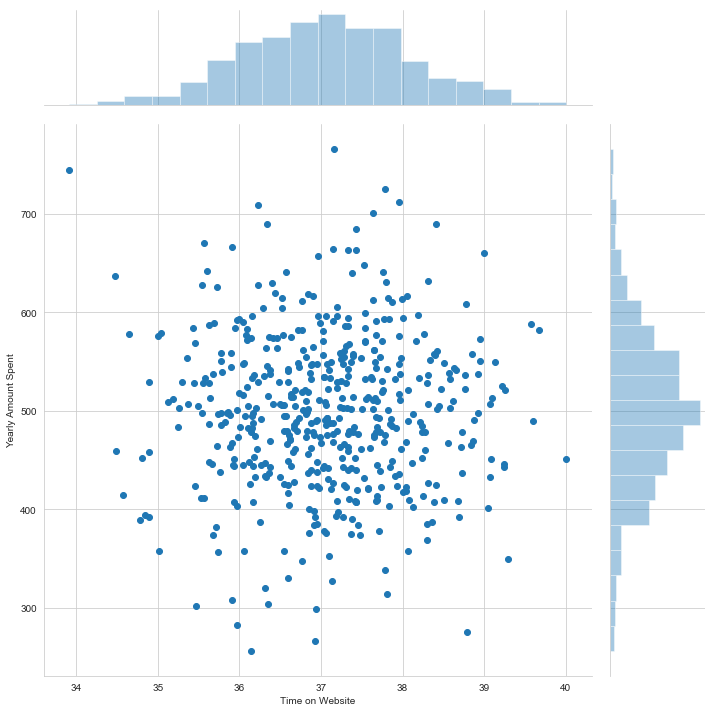

In [19]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = customers, height =10);

From this graph it appears that any trend associated with more time on the website leading to more purchases is at best subtle. 

** Now lets compare the 'Time on App' and 'Yearly Amount Spent' columns. **

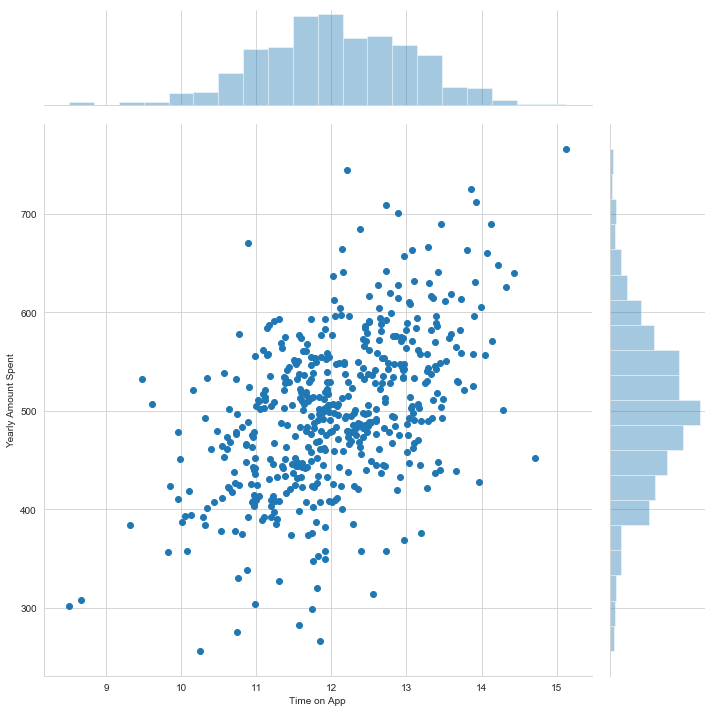

In [21]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = customers, height = 10);

Here we see a clear positive trend between 'Time on App' and 'Yearly Amount Spent', meaning, as 'Time on App' increases, 'Yearly Amount Spent' also tends to increase.

** Lets examine a 2D hex bin plot comparing 'Time on App' and 'Length of Membership'.**

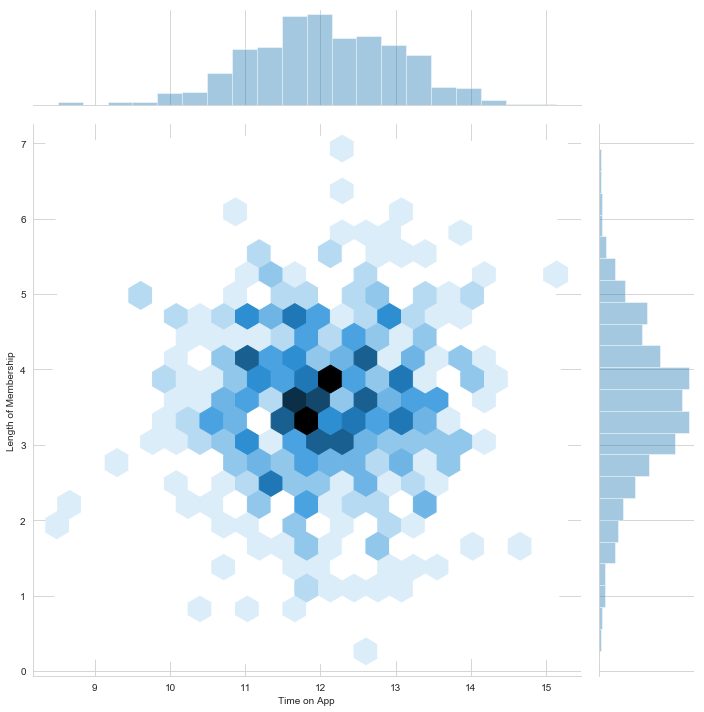

In [22]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers, height = 10);

**Let's explore these types of relationships across the entire data set.**

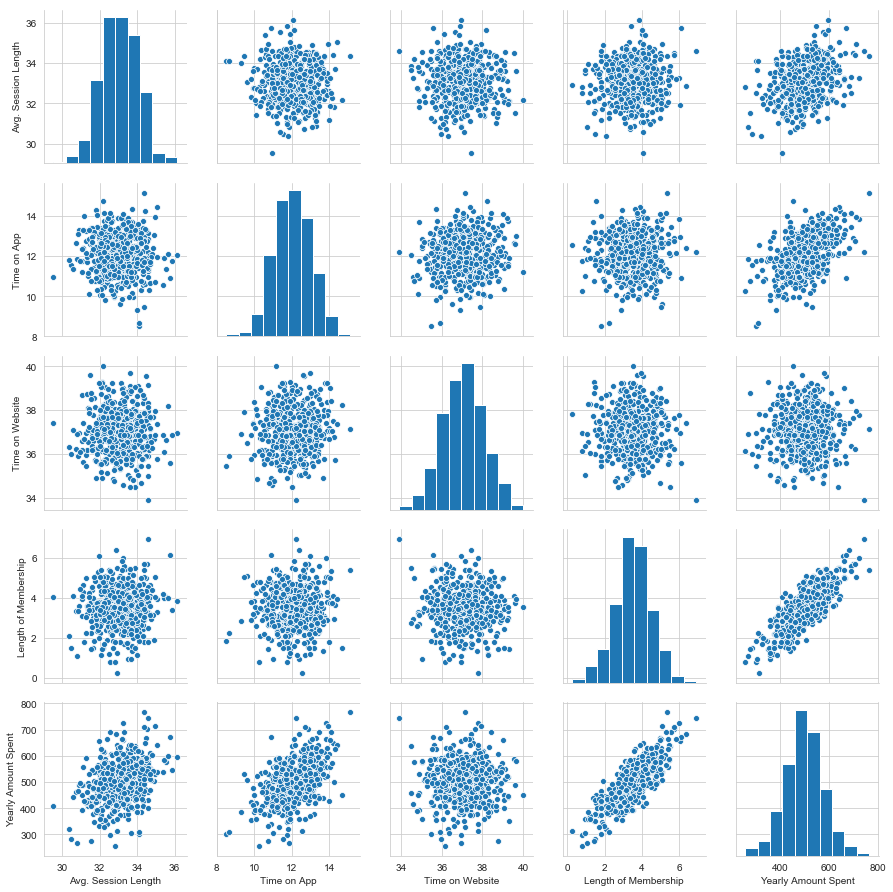

In [23]:
sns.pairplot(data = customers);

Based off of this pairs plot, the feature with the strongest correlation to 'Yearly Amount Spent' is 'Length of Membership,' followed by 'Time on App.'

**Lets examine a linear model plot of  Yearly Amount Spent vs. Length of Membership. **

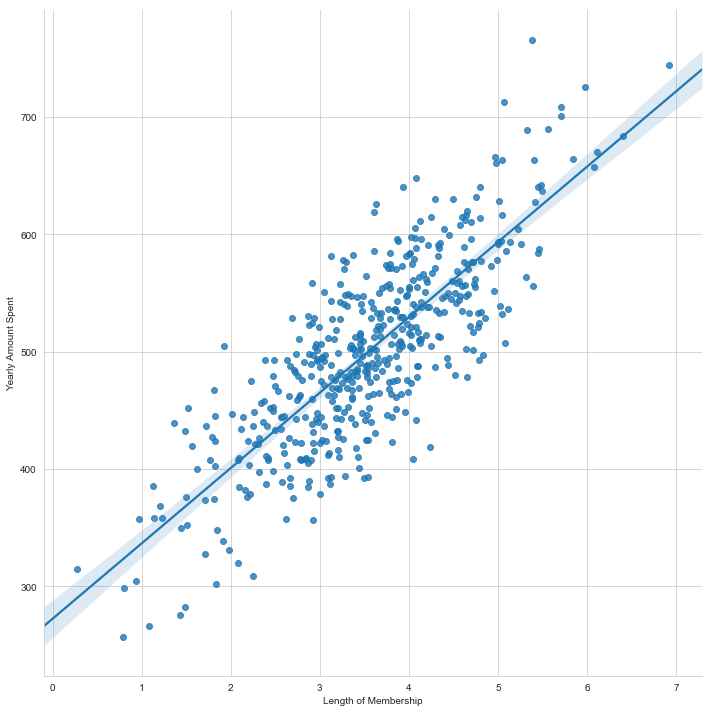

In [26]:
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = customers, height = 10);

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
We will use the numerical features of the dataset to predict "Yearly Amount Spent" column.

In [27]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [28]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .3, random_state = 101)

## Training the Model

Now its time to train our model on our training data!

In [31]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [55]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [56]:
lm.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [57]:
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off of the test values!

In [58]:
predictions = lm.predict(test_X)

** Lets examine a scatterplot of the real test values versus the predicted values. **

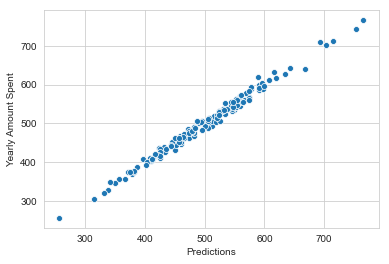

In [59]:
pred = sns.scatterplot(x = predictions, y = test_y)
pred.set(xlabel = 'Predictions');

## Evaluating the Model

To evaluate our models performance, we will calculate the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [60]:
from sklearn import metrics

In [61]:
a = metrics.mean_absolute_error(test_y, predictions)
b = metrics.mean_squared_error(test_y, predictions)
c = np.sqrt(metrics.mean_squared_error(test_y, predictions))
print('Mean Absolute Error: ',a,'\nMean Squared Error: ',b,'\nRoot Mean Squared Error: ',c)

Mean Absolute Error:  7.228148653430838 
Mean Squared Error:  79.81305165097461 
Root Mean Squared Error:  8.933815066978642


## Residuals

Lets examine the residuals to ensure that they are normally distributed.

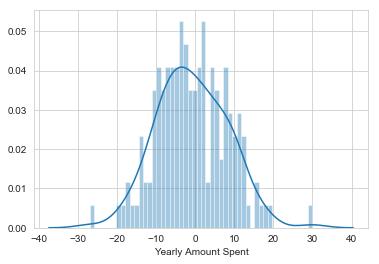

In [62]:
sns.distplot((test_y - predictions), bins = 50); # Somewhat normal

## Conclusion
Should the store focus its efforts on the mobile app or website development? Or maybe Membership Time is what is really important?  Let's interpret the coefficients to get an idea.

In [63]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in 'Avg. Session Length' is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in 'Time on App' is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in 'Time on Website' is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in 'Length of Membership' is associated with an **increase of 61.27 total dollars spent**.

From this examination, it appears the company should develop the website to be as effective in the app. It is clear that the apps performance exceeds that of the website by a large margin, and to capitalize on profits, the company should target its development towards having a higher conversion rate on the website.